### Load data and view format

In [1]:
import os
from gluoncv import model_zoo, data, utils
from matplotlib import pyplot as plt

In [2]:
net = model_zoo.get_model('yolo3_darknet53_voc', pretrained=True)

In [3]:
im_dir = "./images"
im_fnames = [os.path.join(im_dir, f) for f in os.listdir(im_dir) if f.endswith(".jpg")]

X, imgs = data.transforms.presets.yolo.load_test(im_fnames, short=512)
print(type(X), len(X), X[0].shape)  # shape (batch_size, RGB_channels, height, width)
print(type(imgs), len(imgs), imgs[0].shape)

<class 'list'> 3 (1, 3, 512, 791)
<class 'list'> 3 (512, 791, 3)


image (1, 3, 512, 791)
<class 'mxnet.ndarray.ndarray.NDArray'> (1, 100, 1)
<class 'mxnet.ndarray.ndarray.NDArray'> (1, 100, 1)
<class 'mxnet.ndarray.ndarray.NDArray'> (1, 100, 4)


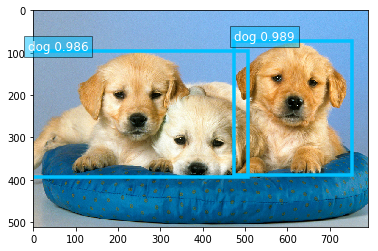

In [4]:
i = 0
class_IDs, scores, bounding_boxes = net(X[i])
print("image", X[i].shape)  # shape (batch_size, RGB_channels, height, width)
print(type(class_IDs), class_IDs.shape)  # (batch_size, num_bboxes, 1)
print(type(scores), scores.shape)  # (batch_size, num_bboxes, 1)
print(type(bounding_boxes), bounding_boxes.shape)  # (batch_size, num_bboxes, 4)

ax = utils.viz.plot_bbox(imgs[i], bounding_boxes[0], scores[0],
                         class_IDs[0], class_names=net.classes)
plt.show()

image (1, 3, 512, 768)
<class 'mxnet.ndarray.ndarray.NDArray'> (1, 100, 1)
<class 'mxnet.ndarray.ndarray.NDArray'> (1, 100, 1)
<class 'mxnet.ndarray.ndarray.NDArray'> (1, 100, 4)


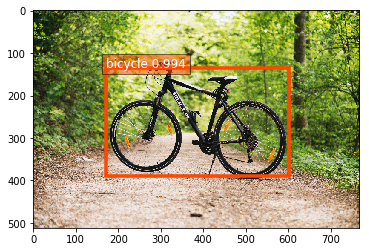

In [5]:
i = 1
class_IDs, scores, bounding_boxes = net(X[i])
print("image", X[i].shape)  # shape (batch_size, RGB_channels, height, width)
print(type(class_IDs), class_IDs.shape)  # (batch_size, num_bboxes, 1)
print(type(scores), scores.shape)  # (batch_size, num_bboxes, 1)
print(type(bounding_boxes), bounding_boxes.shape)  # (batch_size, num_bboxes, 4)

ax = utils.viz.plot_bbox(imgs[i], bounding_boxes[0], scores[0],
                         class_IDs[0], class_names=net.classes)
plt.show()

image (1, 3, 512, 819)
<class 'mxnet.ndarray.ndarray.NDArray'> (1, 100, 1)
<class 'mxnet.ndarray.ndarray.NDArray'> (1, 100, 1)
<class 'mxnet.ndarray.ndarray.NDArray'> (1, 100, 4)


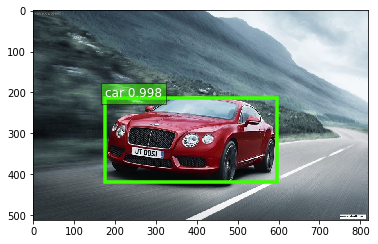

In [6]:
i = 2
class_IDs, scores, bounding_boxes = net(X[i])
print("image", X[i].shape)  # shape (batch_size, RGB_channels, height, width)
print(type(class_IDs), class_IDs.shape)  # (batch_size, num_bboxes, 1)
print(type(scores), scores.shape)  # (batch_size, num_bboxes, 1)
print(type(bounding_boxes), bounding_boxes.shape)  # (batch_size, num_bboxes, 4)

ax = utils.viz.plot_bbox(imgs[i], bounding_boxes[0], scores[0],
                         class_IDs[0], class_names=net.classes)
plt.show()

### Prepare dataset

In [1]:
import os, zipfile
from gluoncv import utils
import mxnet as mx
import numpy as np
from matplotlib import pyplot as plt

im_fname = utils.download('https://github.com/dmlc/web-data/blob/master/' +
                          'gluoncv/datasets/dog.jpg?raw=true',
                          path='dog.jpg')
img = mx.image.imread(im_fname)
ax = utils.viz.plot_image(img)
print(img.shape)  # height, width, channels
plt.show()

100%|██████████| 160/160 [00:02<00:00, 56.45KB/s]

(576, 768, 3)


<Figure size 640x480 with 1 Axes>

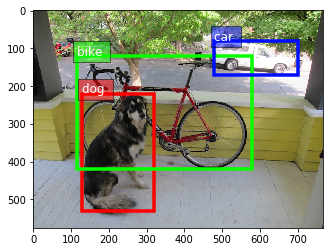

In [2]:
dog_label = [130, 220, 320, 530]  # (xmin, ymin, xmax, ymax)
bike_label = [115, 120, 580, 420]
car_label = [480, 80, 700, 170]
all_boxes = np.array([dog_label, bike_label, car_label])
all_ids = np.array([0, 1, 2])
class_names = ['dog', 'bike', 'car']

# see how it looks by rendering the boxes into image
ax = utils.viz.plot_bbox(img, all_boxes, labels=all_ids, class_names=class_names)
plt.show()